In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import plotly.express as px




# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

import warnings

warnings.filterwarnings('ignore')

df1= pd.read_csv("/Users/sheilaquan/Downloads/bluebikes_tripdata_2019.csv")
df2=pd.read_csv("/Users/sheilaquan/Downloads/bluebikes_tripdata_2020.csv")
df=pd.concat([df1,df2])
df.shape


(4522217, 18)

In [62]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,postal code
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950.0,1.0,2019,12,NaN
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993.0,1.0,2019,12,NaN
2,323,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,381,Inman Square at Springfield St.,42.374384,-71.100157,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4875,Subscriber,1992.0,1.0,2019,12,NaN
3,709,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,185,Third at Binney,42.365445,-71.082771,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,2116,Subscriber,1997.0,1.0,2019,12,NaN
4,332,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,6156,Subscriber,1985.0,1.0,2019,12,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522217 entries, 0 to 1999445
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
 15  year                     int64  
 16  month                    int64  
 17  postal code              object 
dtypes: float64(6), int64(6), object(6)
memory usage: 655.5+ MB


In [67]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
# view the categorical variables

df[categorical].head()



There are 6 categorical variables

The categorical variables are :

 ['starttime', 'stoptime', 'start station name', 'end station name', 'usertype', 'postal code']


,starttime,stoptime,start station name,end station name,usertype,postal code
0,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,Dartmouth St at Newbury St,Kenmore Square,Subscriber,NaN
1,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,MIT Stata Center at Vassar St / Main St,MIT at Mass Ave / Amherst St,Subscriber,NaN
2,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,Inman Square at Springfield St.,Verizon Innovation Hub 10 Ware Street,Subscriber,NaN
3,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,Third at Binney,Sidney Research Campus/ Erie Street at Waverly,Subscriber,NaN
4,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,Verizon Innovation Hub 10 Ware Street,Harvard Law School at Mass Ave / Jarvis St,Subscriber,NaN


In [68]:

# check missing values in categorical variables

df[categorical].isnull().sum()

# no missing values 

starttime                   0
stoptime                    0
start station name          0
end station name            0
usertype                    0
postal code           3080080
dtype: int64

In [69]:
# what is the target variable??? - End station 

df['start station name'].unique()
len(df['start station name'].unique())

409

In [70]:
df['end station name'].unique()
len(df['end station name'].unique())

410

In [71]:
ss=df['start station name'].value_counts()
ss

MIT at Mass Ave / Amherst St               89342
Central Square at Mass Ave / Essex St      83665
MIT Stata Center at Vassar St / Main St    66217
Ames St at Main St                         61538
South Station - 700 Atlantic Ave           56908
                                           ...  
Revere Public Library                          7
Mobile Temporary Station 2                     3
8D QC Station 01                               1
MTL-ECO5.1-01                                  1
MTL-ECO4-01                                    1
Name: start station name, Length: 409, dtype: int64

In [76]:
ee=df['end station name'].value_counts()


In [74]:
# find numerical variables

numerical = [var for var in df.columns if sdf[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 12 numerical variables

The numerical variables are : ['tripduration', 'start station id', 'start station latitude', 'start station longitude', 'end station id', 'end station latitude', 'end station longitude', 'bikeid', 'birth year', 'gender', 'year', 'month']


In [75]:
# view the numerical variables

df[numerical].head()

df.groupby(['year','month']).agg({'tripduration'.['sum']})

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,year,month
0,790,370,42.350961,-71.077828,33,42.348706,-71.097009,5133,1950.0,1.0,2019,12
1,166,80,42.362131,-71.091156,67,42.358100,-71.093198,2653,1993.0,1.0,2019,12
2,323,381,42.374384,-71.100157,221,42.372509,-71.113054,4875,1992.0,1.0,2019,12
3,709,185,42.365445,-71.082771,184,42.357753,-71.103934,2116,1997.0,1.0,2019,12
4,332,221,42.372509,-71.113054,89,42.379011,-71.119945,6156,1985.0,1.0,2019,12


In [91]:
# extract  start_month monthly info 
df.starttime[800900]
df['df_start_month']=df['starttime'].astype(str).str[5:7]

In [92]:
# extract  start_month monthly info 
df['df_end_month']=df['stoptime'].astype(str).str[5:7]

In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522217 entries, 0 to 1999445
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
 15  year                     int64  
 16  month                    int64  
 17  postal code              object 
 18  df_start_month           object 
 19  df_end_month             object 
dtypes: float64(6), int64(6), object(8)
memory usag

In [105]:
mdf=df.groupby(['year','month']).agg({'tripduration':['sum']})

mdf=mdf.reset_index()
mdf.columns =mdf.columns.get_level_values(0)
mdf


,year,month,tripduration
0,2019,1,82260636
1,2019,2,100803450
2,2019,3,153534854
3,2019,4,242062263
4,2019,5,352378234
5,2019,6,907355977
6,2019,7,1114625262
7,2019,8,1305181559
8,2019,9,510699969
9,2019,10,371032724


In [109]:


fig = px.bar(mdf, x="year", y="tripduration", color="tripduration",hover_data=['tripduration'], barmode = 'stack')
 
fig.show()





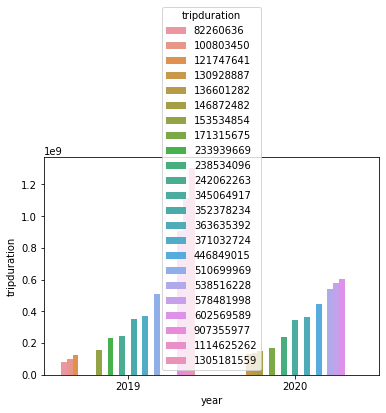

In [112]:
ax = sns.barplot(x="year", y="tripduration",  hue="tripduration",data=mdf)

In [121]:
#March-December in 2019 and from March-December in 2020 (= calculate the records #)

df20=mdf.loc[(mdf['year']==2020) & (mdf['month']>=3)&(mdf['month']<=12)]
df20_sum=df20['tripduration'].sum()
df20_sum

3415895797

In [122]:
df19=mdf.loc[(mdf['year']==2019) & (mdf['month']>=3)&(mdf['month']<=12)]
df19_sum=df19['tripduration'].sum()
df19_sum

5312558152

In [123]:
# change %
decrease=(df19_sum-df20_sum)/df19_sum*100
decrease

35.70148882579234